#  **Our Company**

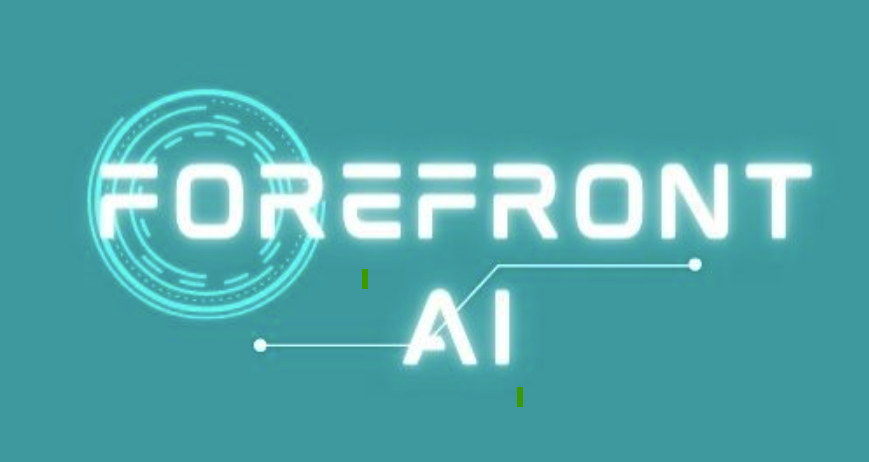



## About us

> We are a medium sized data science company based in Nairobi,Kenya.

> We provide data science solutions to the finance sector, health sector , governement entities and more that helps drive informed and profitable business decisions.

## Services
> Data Collection

> Data cleaning

> Data Analysis

> Model Buiding

## Values

> Skilled and equippe employees

> Great quality of work

> Less lead times

## Team

> Mandy : Machine Learnin Specialist

> Nonokazi : Data Scientist

> Omolayo: Data Engineer

> John: Data Analyst

> Alatishe: Scrum Master

## Contact

> email: admin@forefrontai.com

> contact : +255 3425 627468

> address: 1023 Nimble road, Nairobi, Namibia


# Introduction


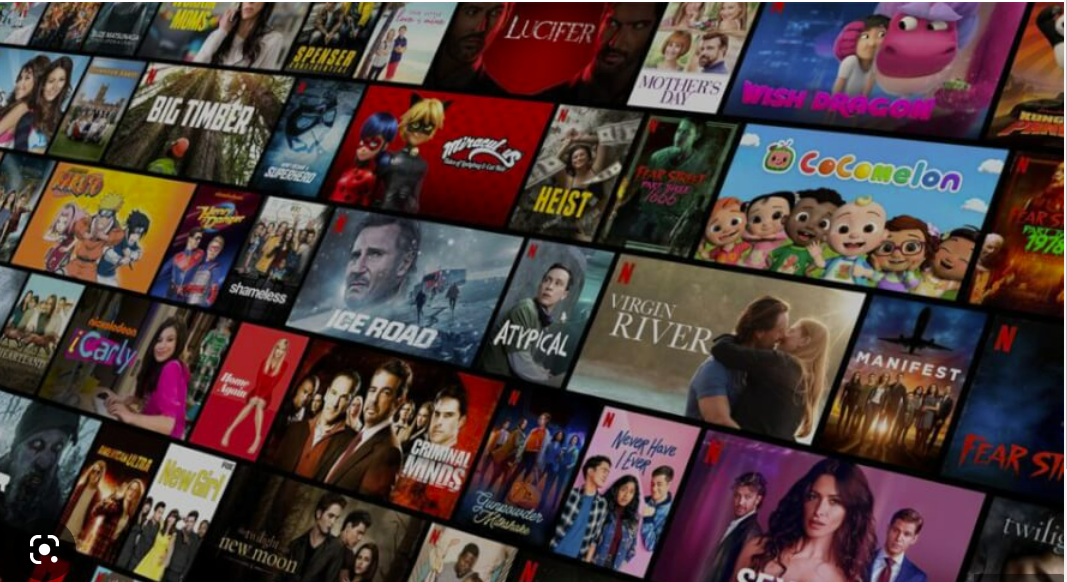



The use of online streaming and purchasing services over the years increased and continues to increase sharply.
In this technology driven era, individuals use online streaming services such as Netflix, dhowmax to watch their favourite movies and series. Online stores such as takealot allows for consumers to purchase items such as books, furniture etc online.
 It is apparent that online services are the new norm and will be into the future.

In light of this new era, recommender systems are imperative. Recommender systems are systems that are used to recommend things to the user based on relevance. 
Recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis.
Recommender systems helps increase customer satisfaction and user retention and lead to an increase in an organisation's revenue.

The aim of this project is to construct a recommendation algorithm based on content and collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.




<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
  

In this section we import the libraries that will be used throughout our analysis and modelling. 


---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

<a id="two"></a>
## 2. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

EDA is a data exploration technique to understand the various aspects of the data. EDA is often used to see what data may disclose outside of formal modelling and to learn more about the variables in a data collection and how they interact.

In this section we will load all the datasets that will be used for the project abd perform exploratory data analysis. in order to farmiliarise ourselves with the data and discover patterns and any issues that the datasets may countain.

---

### 2.1 Train data

Below we load the train data and inspect the shape of the dataset:

In [55]:
train = pd.read_csv("train.csv")

In [56]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [57]:
train.shape

(10000038, 4)

The train dataset consists of 4 columns as can be seen above and 10000038 entries

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


The datatypes of each feature can be seen above.

In [59]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

All columns do not contain any null values.

#### rating frequency

Below we visualize the count of ratings

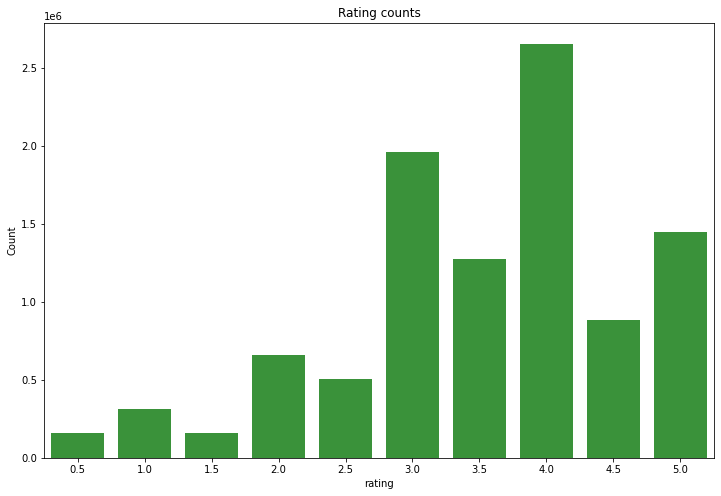

Average rating in dataset: 3.5333951730983424


In [60]:
plt.figure(figsize=(12,8)) #set fig size
base_color = sns.color_palette()[2]
sns.countplot(x='rating' ,data = train,color=base_color)
plt.ylabel('Count')
plt.xlabel('rating')
plt.title('Rating counts')
plt.show()
print (f'Average rating in dataset: {np.mean(train["rating"])}')

 - Above we can see that most movies received ratings beyween 3.0 and 5.0.
 - Most movies were given a rating of 4.0
 - Only a few movies were received a rating between  0.5 and 2.5
 - The average rating the movies received was 3.5 as can be seen above.

### Movies Data

In [61]:
movies = pd.read_csv("movies.csv")

In [62]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
movies.shape

(62423, 3)

- The movies dataset consists of 3 columns namely: movieId, title, genres as can be seen above
- It consists also of 62423 entries.

In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


- The datatypes of each feature are shown above
- Both title and genres are of object datatype and movieId is of int datatype
- The features have no missing values as can beseen aaslo by number of non-null values above

In [65]:
movies.duplicated().sum()

0

### Merge Train and Movies

In [66]:
new = train.merge(movies, on='movieId')
new.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [67]:
new.drop(['timestamp'], axis=1, inplace=True)

In [68]:
new.head()

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller


#### Fix Genre column

In [69]:
#Every genre is separated by a | so we simply have to call the split function on |
new['genres'] = new.genres.str.split('|')
new.head()

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
1,87388,57669,3.5,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
2,137050,57669,4.0,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
3,120490,57669,4.5,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
4,50616,57669,4.5,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"


#### Top 10 Most Rated Movies

In [70]:
# Calculate count rating of all movies
new_groups = new.groupby('title')['rating'].count().sort_values(ascending=False)[0:10]

In [71]:
new_groups

title
Shawshank Redemption, The (1994)             32831
Forrest Gump (1994)                          32383
Pulp Fiction (1994)                          31697
Silence of the Lambs, The (1991)             29444
Matrix, The (1999)                           29014
Star Wars: Episode IV - A New Hope (1977)    27560
Jurassic Park (1993)                         25518
Schindler's List (1993)                      24004
Braveheart (1995)                            23722
Fight Club (1999)                            23536
Name: rating, dtype: int64

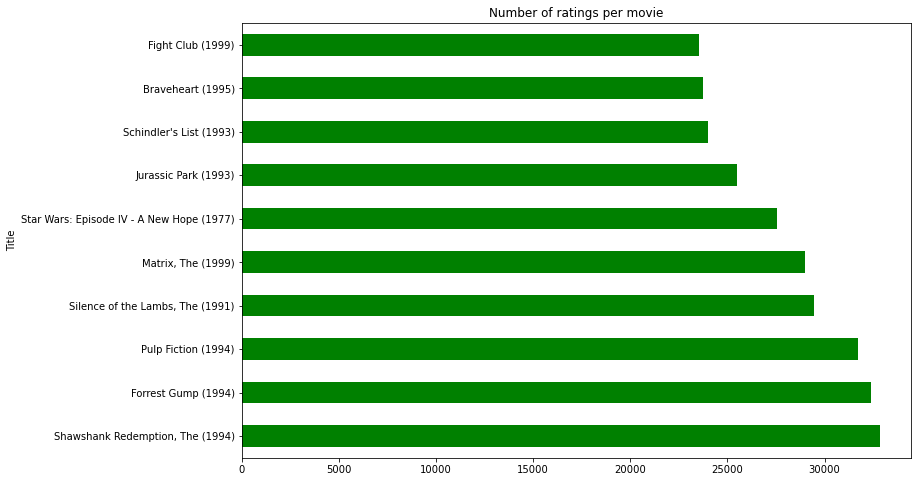

In [72]:
new_groups.plot(kind='barh', title='Number of ratings per movie',
               ylabel='Number of Ratings', xlabel='Title', figsize=(12, 8), color='green');

#### Most Popular Genre

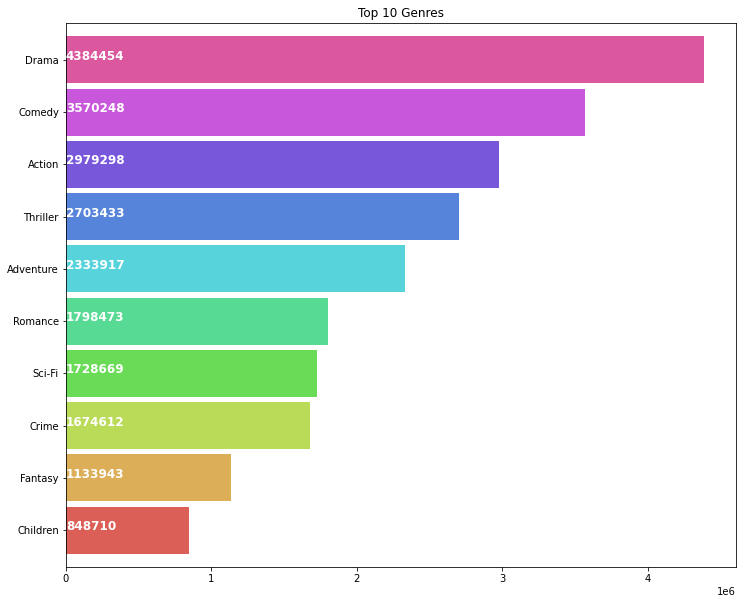

In [76]:
plt.subplots(figsize=(12,10))
list1=[]
for i in new['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('hls',10))
for i,v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v, fontsize=12, color='white', weight='bold')
plt.title("Top 10 Genres")
plt.show()

Above we can see that the most popular genre is Drama and the least genre from the top 10 being Children.

#### Years with the most released movies

In [77]:
new_df = new.copy()

In [79]:
new_df.head()

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
1,87388,57669,3.5,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
2,137050,57669,4.0,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
3,120490,57669,4.5,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
4,50616,57669,4.5,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"


##### Extract year from title

In [80]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
new_df['year'] = new_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
new_df['year'] = new_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
new_df['title'] = new_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
new_df['title'] = new_df['title'].apply(lambda x: x.strip())
new_df.head()

C:\Users\MCMS\AppData\Local\Temp\ipykernel_29624\4089038831.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['title'] = new_df.title.str.replace('(\(\d\d\d\d\))', '')


,userId,movieId,rating,title,genres,year
0,5163,57669,4.0,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
1,87388,57669,3.5,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
2,137050,57669,4.0,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
3,120490,57669,4.5,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008
4,50616,57669,4.5,In Bruges,"[Comedy, Crime, Drama, Thriller]",2008


In [81]:
new_df.year.value_counts()

1995    598412
1994    521621
1999    450391
1996    444231
2000    386359
         ...  
1892        12
1878         6
1883         6
1887         3
1874         2
Name: year, Length: 134, dtype: int64

In [96]:
new_group = new_df.groupby('year')['movieId'].count().sort_values(ascending=False)[0:10]

In [97]:
new_group

year
1995    598412
1994    521621
1999    450391
1996    444231
2000    386359
1997    372869
1993    371445
2001    360392
1998    357105
2002    327004
Name: movieId, dtype: int64

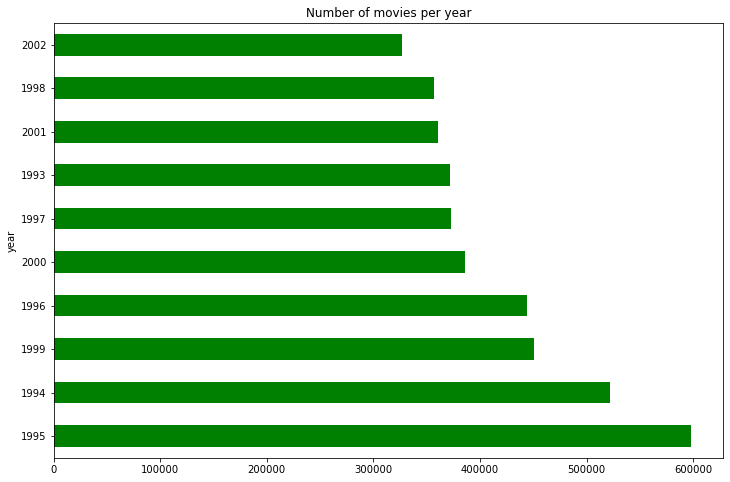

In [93]:
new_group.plot(kind='barh', title='Number of movies per year',
               ylabel='Number of Movies', xlabel='year', figsize=(12, 8), color='green');

#### Tags Dataset

In [98]:
tags = pd.read_csv("tags.csv")

In [99]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [100]:
tags.tag.value_counts()

sci-fi              8330
atmospheric         6516
action              5907
comedy              5702
surreal             5326
                    ... 
teen sleuth            1
evil twins             1
paternity test         1
QVC                    1
cornetto triolgy       1
Name: tag, Length: 73050, dtype: int64

In [116]:
imdb = pd.read_csv("imdb_data.csv")
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


#### Drop uneeded columns

In [117]:
imdb.drop(['runtime', 'budget'], axis=1, inplace=True)

In [118]:
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion


#### Convert title_cast and Plot_keys into a list

In [119]:
# Title Cast
imdb['title_cast'] = imdb.title_cast.str.split('|')
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,board game|adventurer|fight|game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,black american|husband wife relationship|betra...
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,fatherhood|doberman|dog|mansion


In [120]:
# Plot keywords
imdb['plot_keywords'] = imdb.plot_keywords.str.split('|')
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,"[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,"[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,"[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,"[fatherhood, doberman, dog, mansion]"


In [121]:
imdb.shape

(27278, 4)

In [122]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movieId        27278 non-null  int64 
 1   title_cast     17210 non-null  object
 2   director       17404 non-null  object
 3   plot_keywords  16200 non-null  object
dtypes: int64(1), object(3)
memory usage: 852.6+ KB


In [133]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director             0
plot_keywords    11078
dtype: int64

In [138]:
imdb = imdb.dropna(axis=0, how='any')

In [139]:
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,"[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,"[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,"[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,"[fatherhood, doberman, dog, mansion]"


In [140]:
imdb.isnull().sum()

movieId          0
title_cast       0
director         0
plot_keywords    0
dtype: int64

### Top 10 Cat

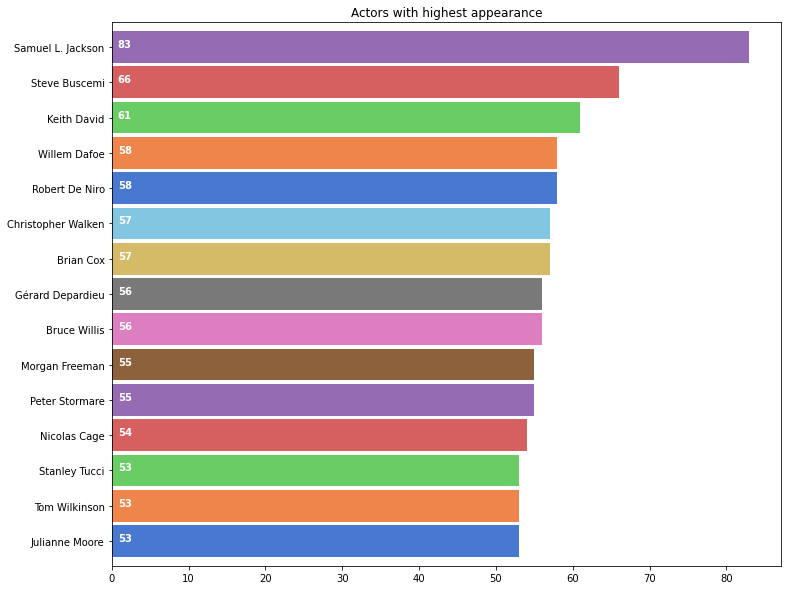

In [161]:
plt.subplots(figsize=(12,10))
list1=[]
for i in imdb['title_cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Top 15 cast')
plt.show()

### Top 10 Directors

In [141]:
groups = imdb.groupby('director')['movieId'].count().sort_values(ascending=False)[0:10]

In [142]:
groups

director
Woody Allen            26
See full summary       26
Luc Besson             26
Stephen King           24
William Shakespeare    19
Tyler Perry            15
Ki-duk Kim             15
Takeshi Kitano         14
Robert Rodriguez       14
Kevin Smith            13
Name: movieId, dtype: int64

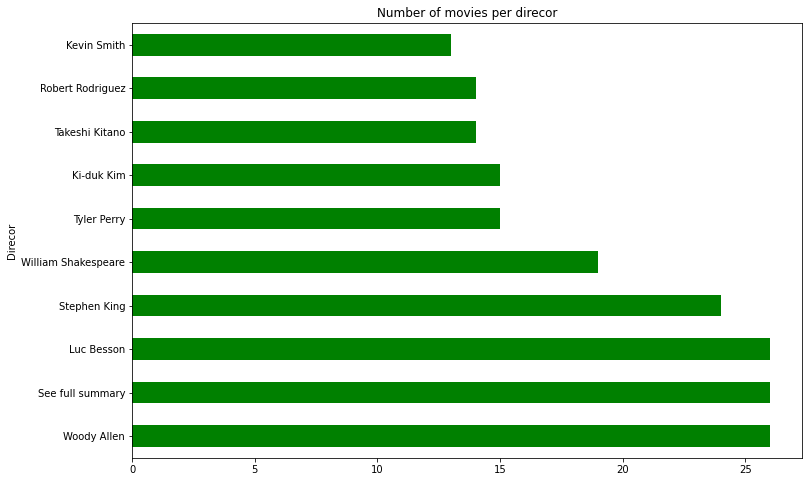

In [144]:
groups.plot(kind='barh', title='Number of movies per direcor',
               ylabel='Number of Movies', xlabel='Direcor', figsize=(12, 8), color='green');

In [145]:
imdb['plot_keywords'] = imdb['plot_keywords'].apply(lambda x: " ".join(x))
imdb.head()

,movieId,title_cast,director,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,toy rivalry cowboy cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,board game adventurer fight game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,boat lake neighbor rivalry
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,black american husband wife relationship betra...
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,fatherhood doberman dog mansion


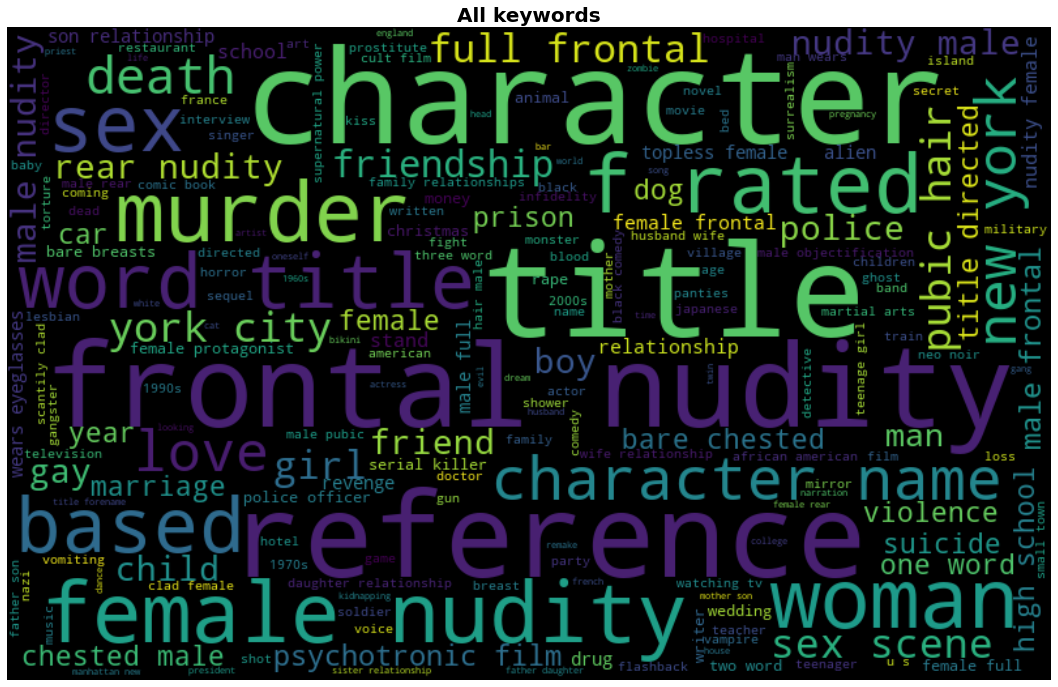

In [146]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in imdb['plot_keywords']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All keywords", size=20, weight="bold")
plt.axis('off')
plt.show()

In [113]:
tags = pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


#### drop timestamp

In [147]:
tags.drop(['timestamp'], axis=1, inplace=True)

In [148]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [151]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [155]:
tags = tags.dropna(axis=0, how='any')

In [156]:
tags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

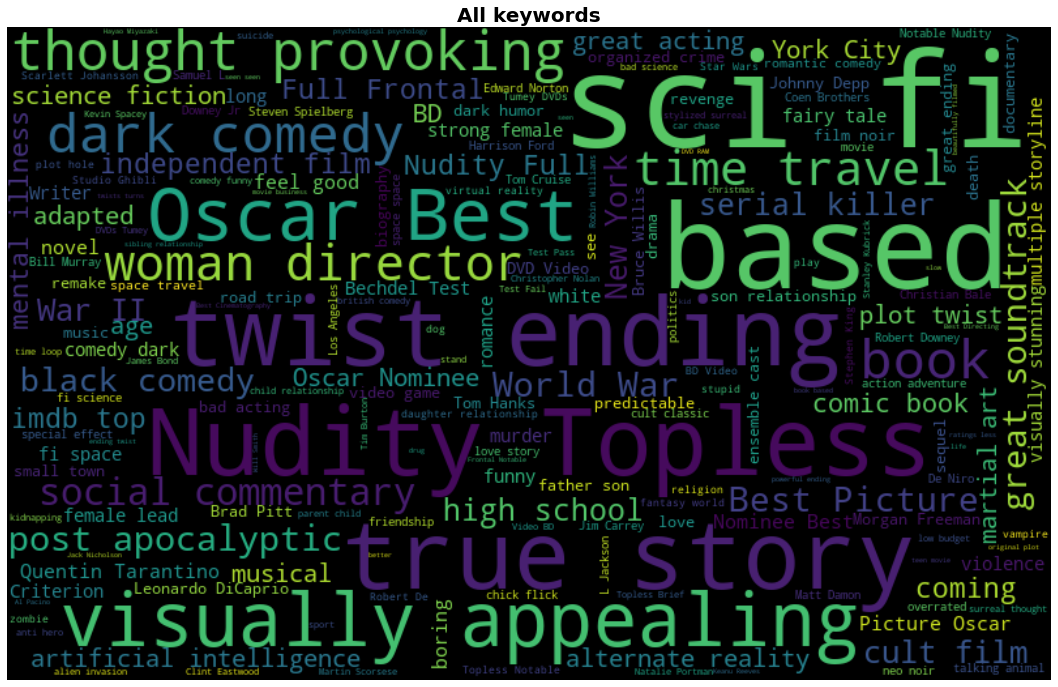

In [158]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in tags['tag']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All keywords", size=20, weight="bold")
plt.axis('off')
plt.show()